# Time series forecasting on Wikipedia web traffic

In [4]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [96]:
train = pd.read_csv('file:///Users/vjovanovic/Downloads/train_1.csv')
train[100:120]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
100,Monstar_zh.wikipedia.org_all-access_spider,0.0,8.0,6.0,4.0,16.0,3.0,18.0,9.0,7.0,...,9.0,17.0,5.0,6.0,5.0,10.0,8.0,5.0,13.0,5.0
101,Mrs._Cop_2_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,13.0,4.0,6.0,5.0,13.0,8.0,5.0,16.0,8.0
102,NBA_zh.wikipedia.org_all-access_spider,46.0,12.0,16.0,39.0,53.0,11.0,27.0,71.0,21.0,...,27.0,24.0,58.0,330.0,69.0,17.0,25.0,28.0,46.0,38.0
103,NCT_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,23.0,20.0,19.0,166.0,332.0,159.0,223.0,26.0,41.0
104,NEW_GAME!_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,10.0,18.0,35.0,12.0,7.0,18.0,8.0,23.0,24.0
105,Netflix_zh.wikipedia.org_all-access_spider,7.0,10.0,21.0,2.0,9.0,13.0,7.0,6.0,7.0,...,21.0,18.0,44.0,36.0,29.0,25.0,31.0,26.0,19.0,19.0
106,Niantic_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,16.0,6.0,5.0,11.0,9.0,9.0,6.0,12.0,4.0
107,ONE_OK_ROCK_zh.wikipedia.org_all-access_spider,5.0,0.0,5.0,0.0,5.0,1.0,1.0,5.0,5.0,...,18.0,11.0,21.0,36.0,12.0,30.0,21.0,18.0,14.0,30.0
108,ONE_PIECE_zh.wikipedia.org_all-access_spider,16.0,25.0,18.0,48.0,30.0,13.0,17.0,24.0,18.0,...,36.0,61.0,67.0,36.0,77.0,35.0,44.0,89.0,74.0,39.0
109,ONE_PIECE_FILM_GOLD_zh.wikipedia.org_all-acces...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,35.0,27.0,37.0,26.0,29.0,52.0,36.0,29.0,18.0


In [5]:
train.info() #svaki red je različiti članak a kolone predstavljaju datum za 551 dan, počev od 2015-07-01 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [111]:
train.columns[-500:]

Index(['2015-08-20', '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
       '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=500)

In [121]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train_flattened.head()

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0


In [12]:
train_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253150 entries, 0 to 7253149
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Page    object 
 1   date    object 
 2   Visits  float64
dtypes: float64(1), object(2)
memory usage: 166.0+ MB


In [122]:
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]') # prebacivanje u datum type
train_flattened[20:30].date.dt.dayofweek

20    5
21    5
22    5
23    5
24    5
25    5
26    5
27    5
28    5
29    5
Name: date, dtype: int64

In [16]:
train_flattened[20:30]

,Page,date,Visits
20,B1A4_zh.wikipedia.org_all-access_spider,2016-11-12,16.0
21,BDSM_zh.wikipedia.org_all-access_spider,2016-11-12,17.0
22,BEAST_zh.wikipedia.org_all-access_spider,2016-11-12,9.0
23,BIGBANG_zh.wikipedia.org_all-access_spider,2016-11-12,17.0
24,BLACK_PINK_zh.wikipedia.org_all-access_spider,2016-11-12,44.0
25,BLEACH_zh.wikipedia.org_all-access_spider,2016-11-12,17.0
26,BTOB_zh.wikipedia.org_all-access_spider,2016-11-12,22.0
27,Beautiful_Mind_zh.wikipedia.org_all-access_spider,2016-11-12,8.0
28,Beyond_zh.wikipedia.org_all-access_spider,2016-11-12,61.0
29,Big_zh.wikipedia.org_all-access_spider,2016-11-12,10.0


In [123]:
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float) #deljenje celim brojevima, koliko 5 stane u 7, vraća jedan za brojeve veće od 5

In [124]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

In [125]:
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [126]:
median = train_flattened.groupby(['Page'])['Visits'].median()
median.sort_values(ascending=False, inplace=True)
median[50:100]

Page
La7_en.wikipedia.org_desktop_all-agents                                                  119184.5
Special:Search_commons.wikimedia.org_all-access_all-agents                               113867.0
Lali_Espósito_es.wikipedia.org_desktop_all-agents                                        113308.0
Deaths_in_2016_en.wikipedia.org_all-access_all-agents                                    111062.0
Wikipedia:首页_zh.wikipedia.org_mobile-web_all-agents                                      109463.5
メインページ_ja.wikipedia.org_mobile-web_all-agents                                            109223.0
Lali_Espósito_en.wikipedia.org_all-access_all-agents                                     108732.5
Main_Page_commons.wikimedia.org_desktop_all-agents                                       108252.5
Elizabeth_II_en.wikipedia.org_all-access_all-agents                                      106001.5
Special:Search_commons.wikimedia.org_desktop_all-agents                                  103282.5
Lali_Espósito_e

In [127]:
train_flattened.reset_index(drop=False,inplace=True)

In [128]:
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())

In [129]:
# Feature engineering with the date
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

In [130]:
train_flattened['month'].value_counts()

12    4496953
11    2756197
Name: month, dtype: int64

In [81]:
donald = train_flattened[train_flattened['Page']=='Donald_Trump_en.wikipedia.org_all-access_all-agents'][['date','Visits']].groupby(['date'])['Visits'].mean()
#mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()

In [71]:
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()

date
2016-11-12    1536.471757
2016-11-13    1679.630589
2016-11-14    1701.941831
2016-11-15    1564.172228
2016-11-16    1520.673959
2016-11-17    1463.751937
2016-11-18    1396.544145
2016-11-19    1399.170412
2016-11-20    1482.018739
2016-11-21    1529.844585
2016-11-22    1526.723944
2016-11-23    1444.043898
2016-11-24    1373.814638
2016-11-25    1326.709107
2016-11-26    1472.107224
2016-11-27    1583.903133
2016-11-28    1460.719082
2016-11-29    1533.142157
2016-11-30    1400.355717
2016-12-01    1389.007191
2016-12-02    1349.266773
2016-12-03    1440.036531
2016-12-04    1525.511597
2016-12-05    1513.758528
2016-12-06    1495.341920
2016-12-07    1444.830664
2016-12-08    1416.289162
2016-12-09    1369.501143
2016-12-10    1360.451215
2016-12-11    1439.703425
2016-12-12    1457.877654
2016-12-13    1393.217357
2016-12-14    1456.495662
2016-12-15    1338.356251
2016-12-16    1265.571850
2016-12-17    1280.523597
2016-12-18    1474.682207
2016-12-19    1561.789931
2016-12

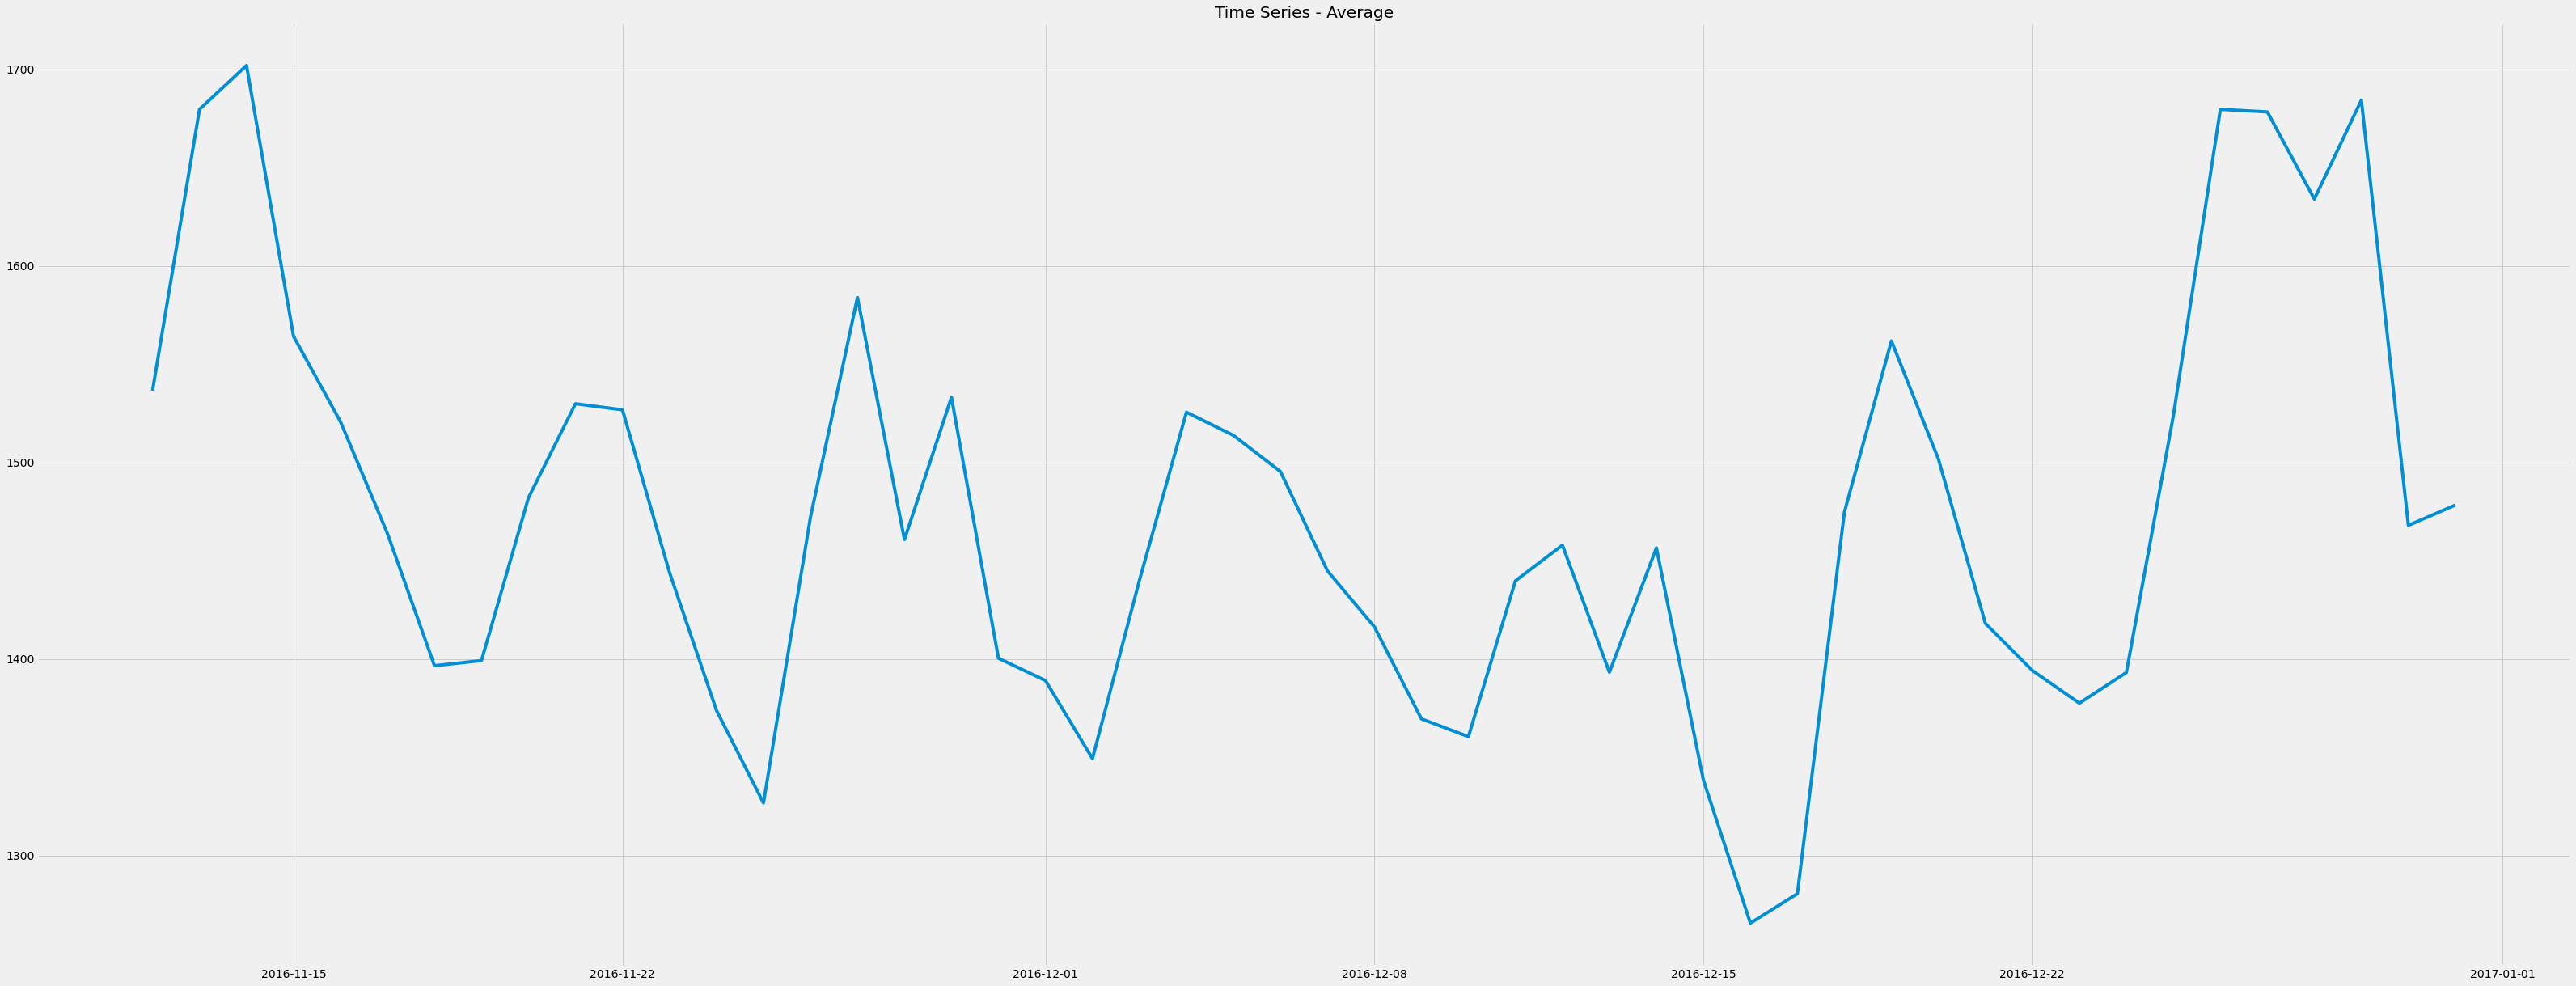

In [84]:
plt.figure(figsize=(50, 20))
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

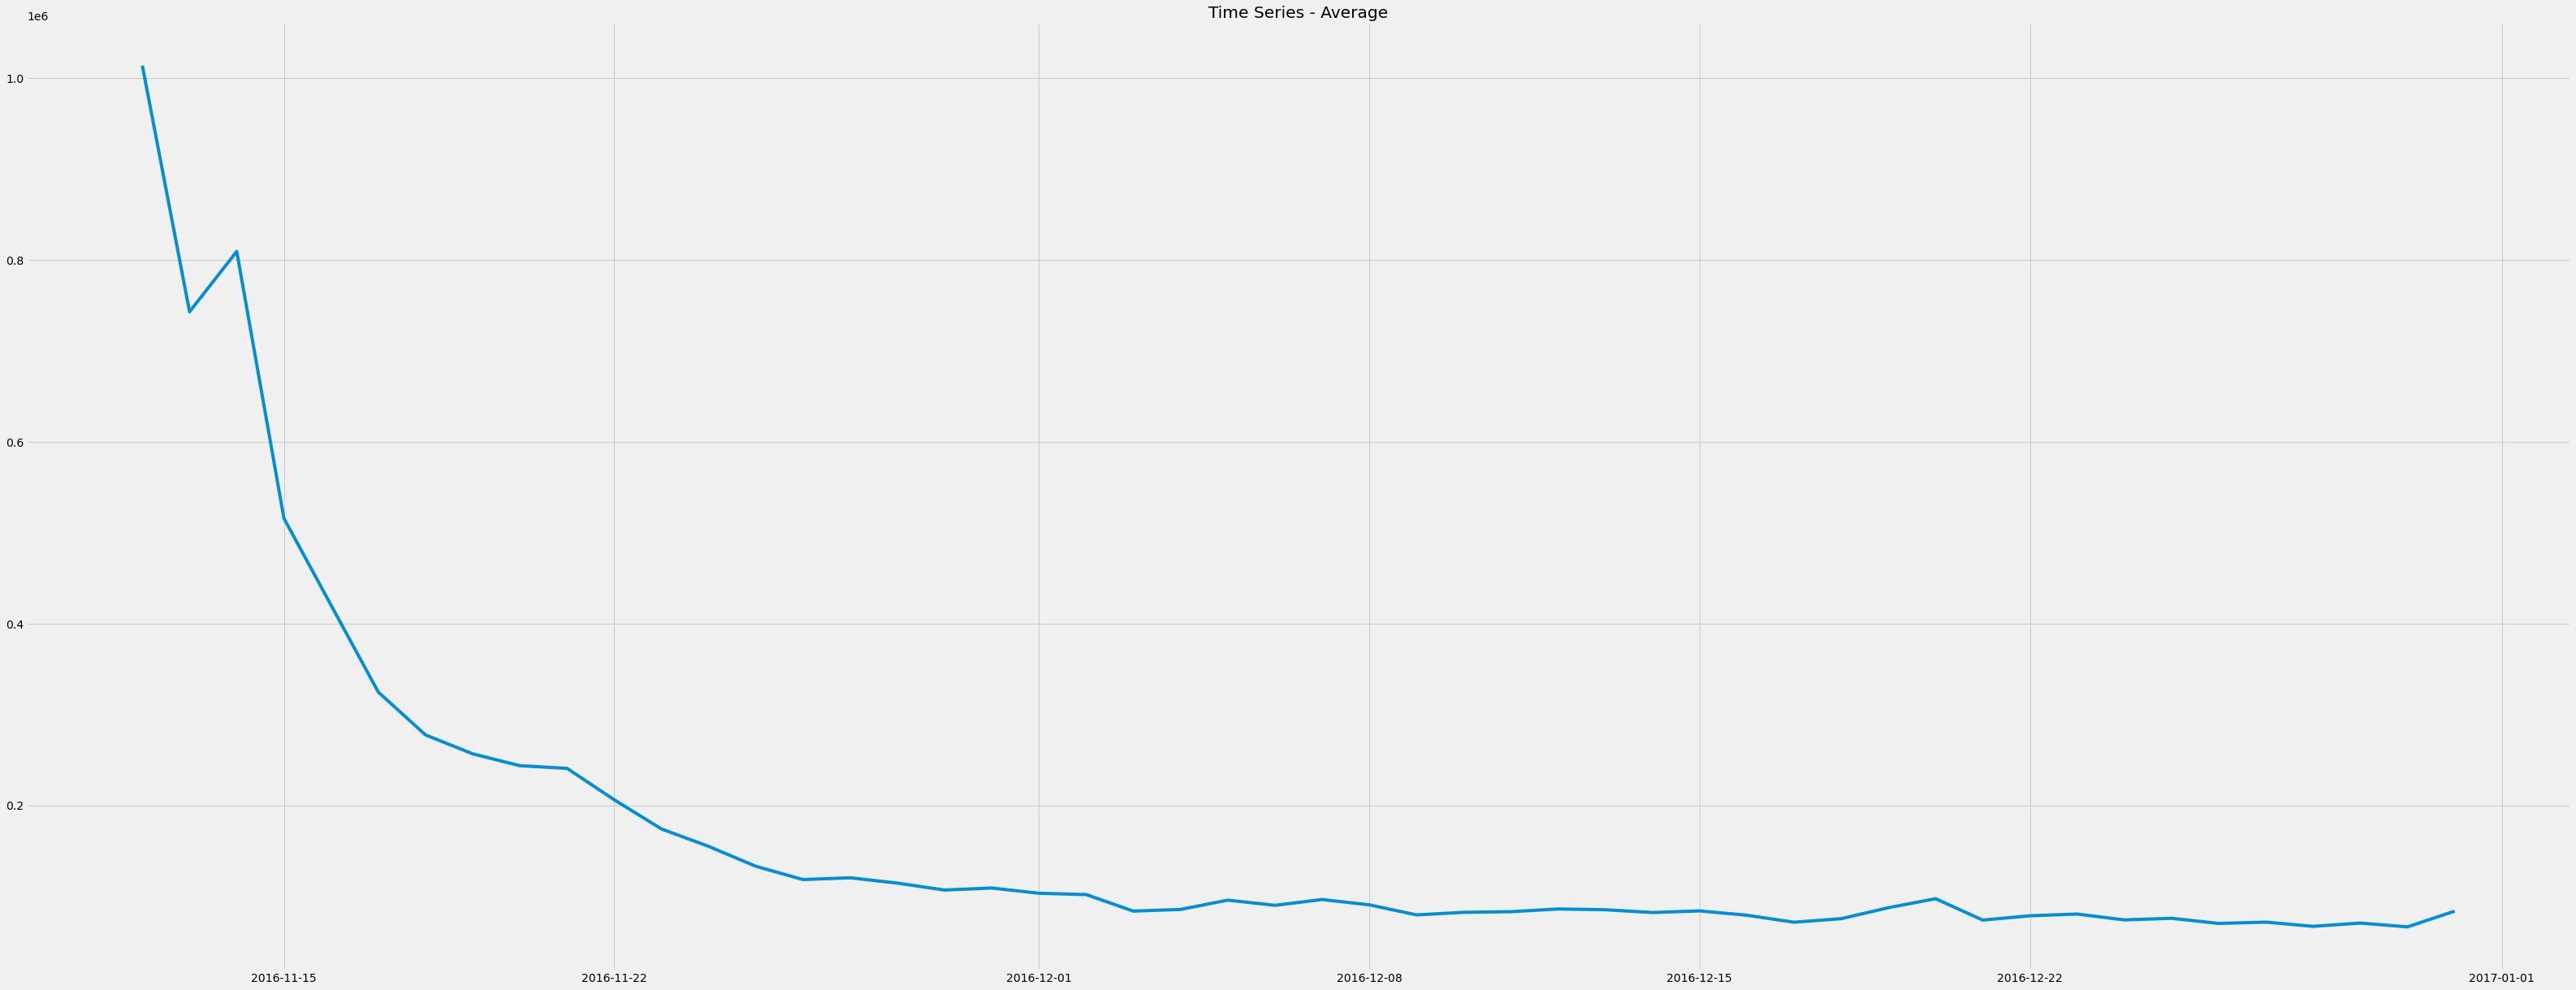

In [85]:
plt.figure(figsize=(50, 20))
plt.plot(donald)
plt.title('Time Series - Average')
plt.show()

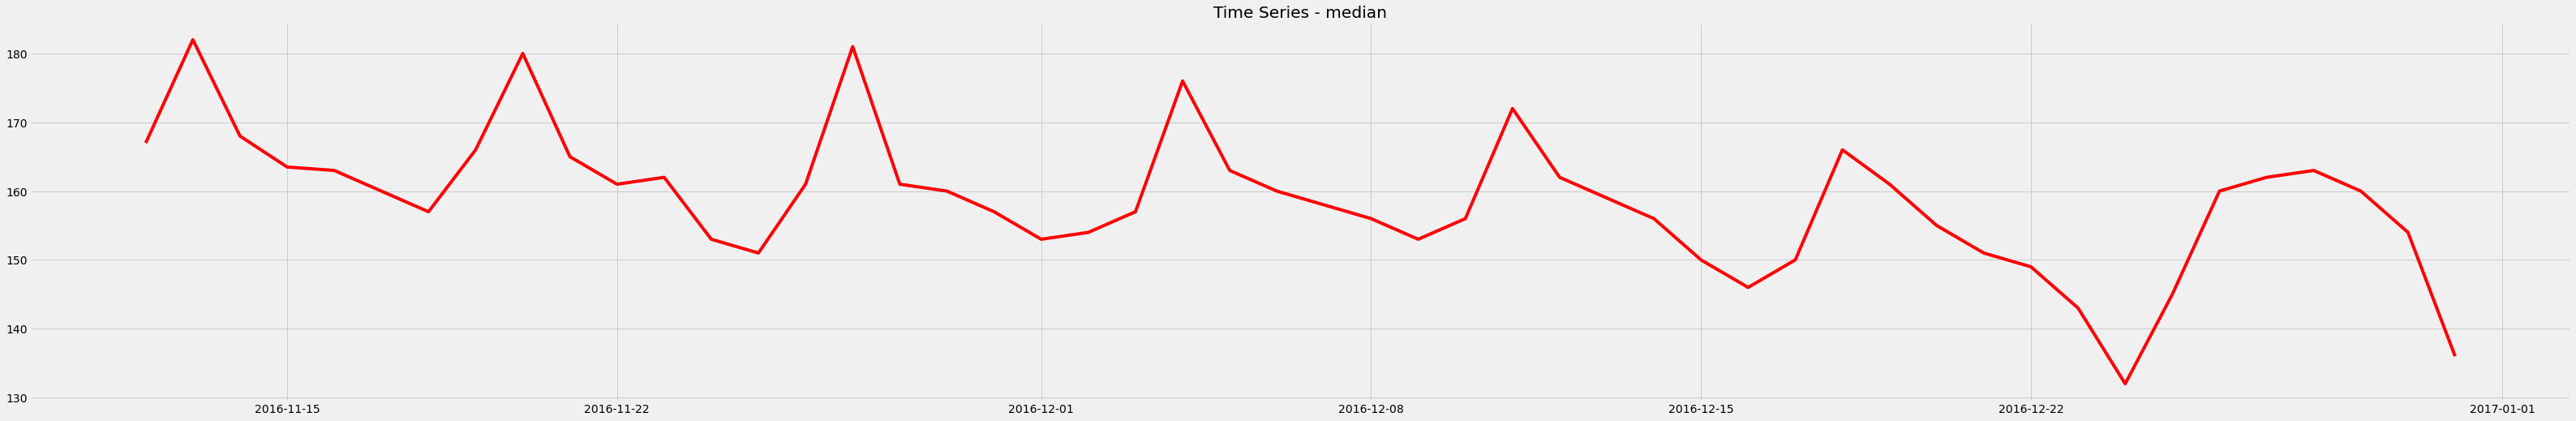

In [86]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

In [92]:
train_flattened['month'].value_counts()

12    4496953
11    2756197
Name: month, dtype: int64

In [87]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [88]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

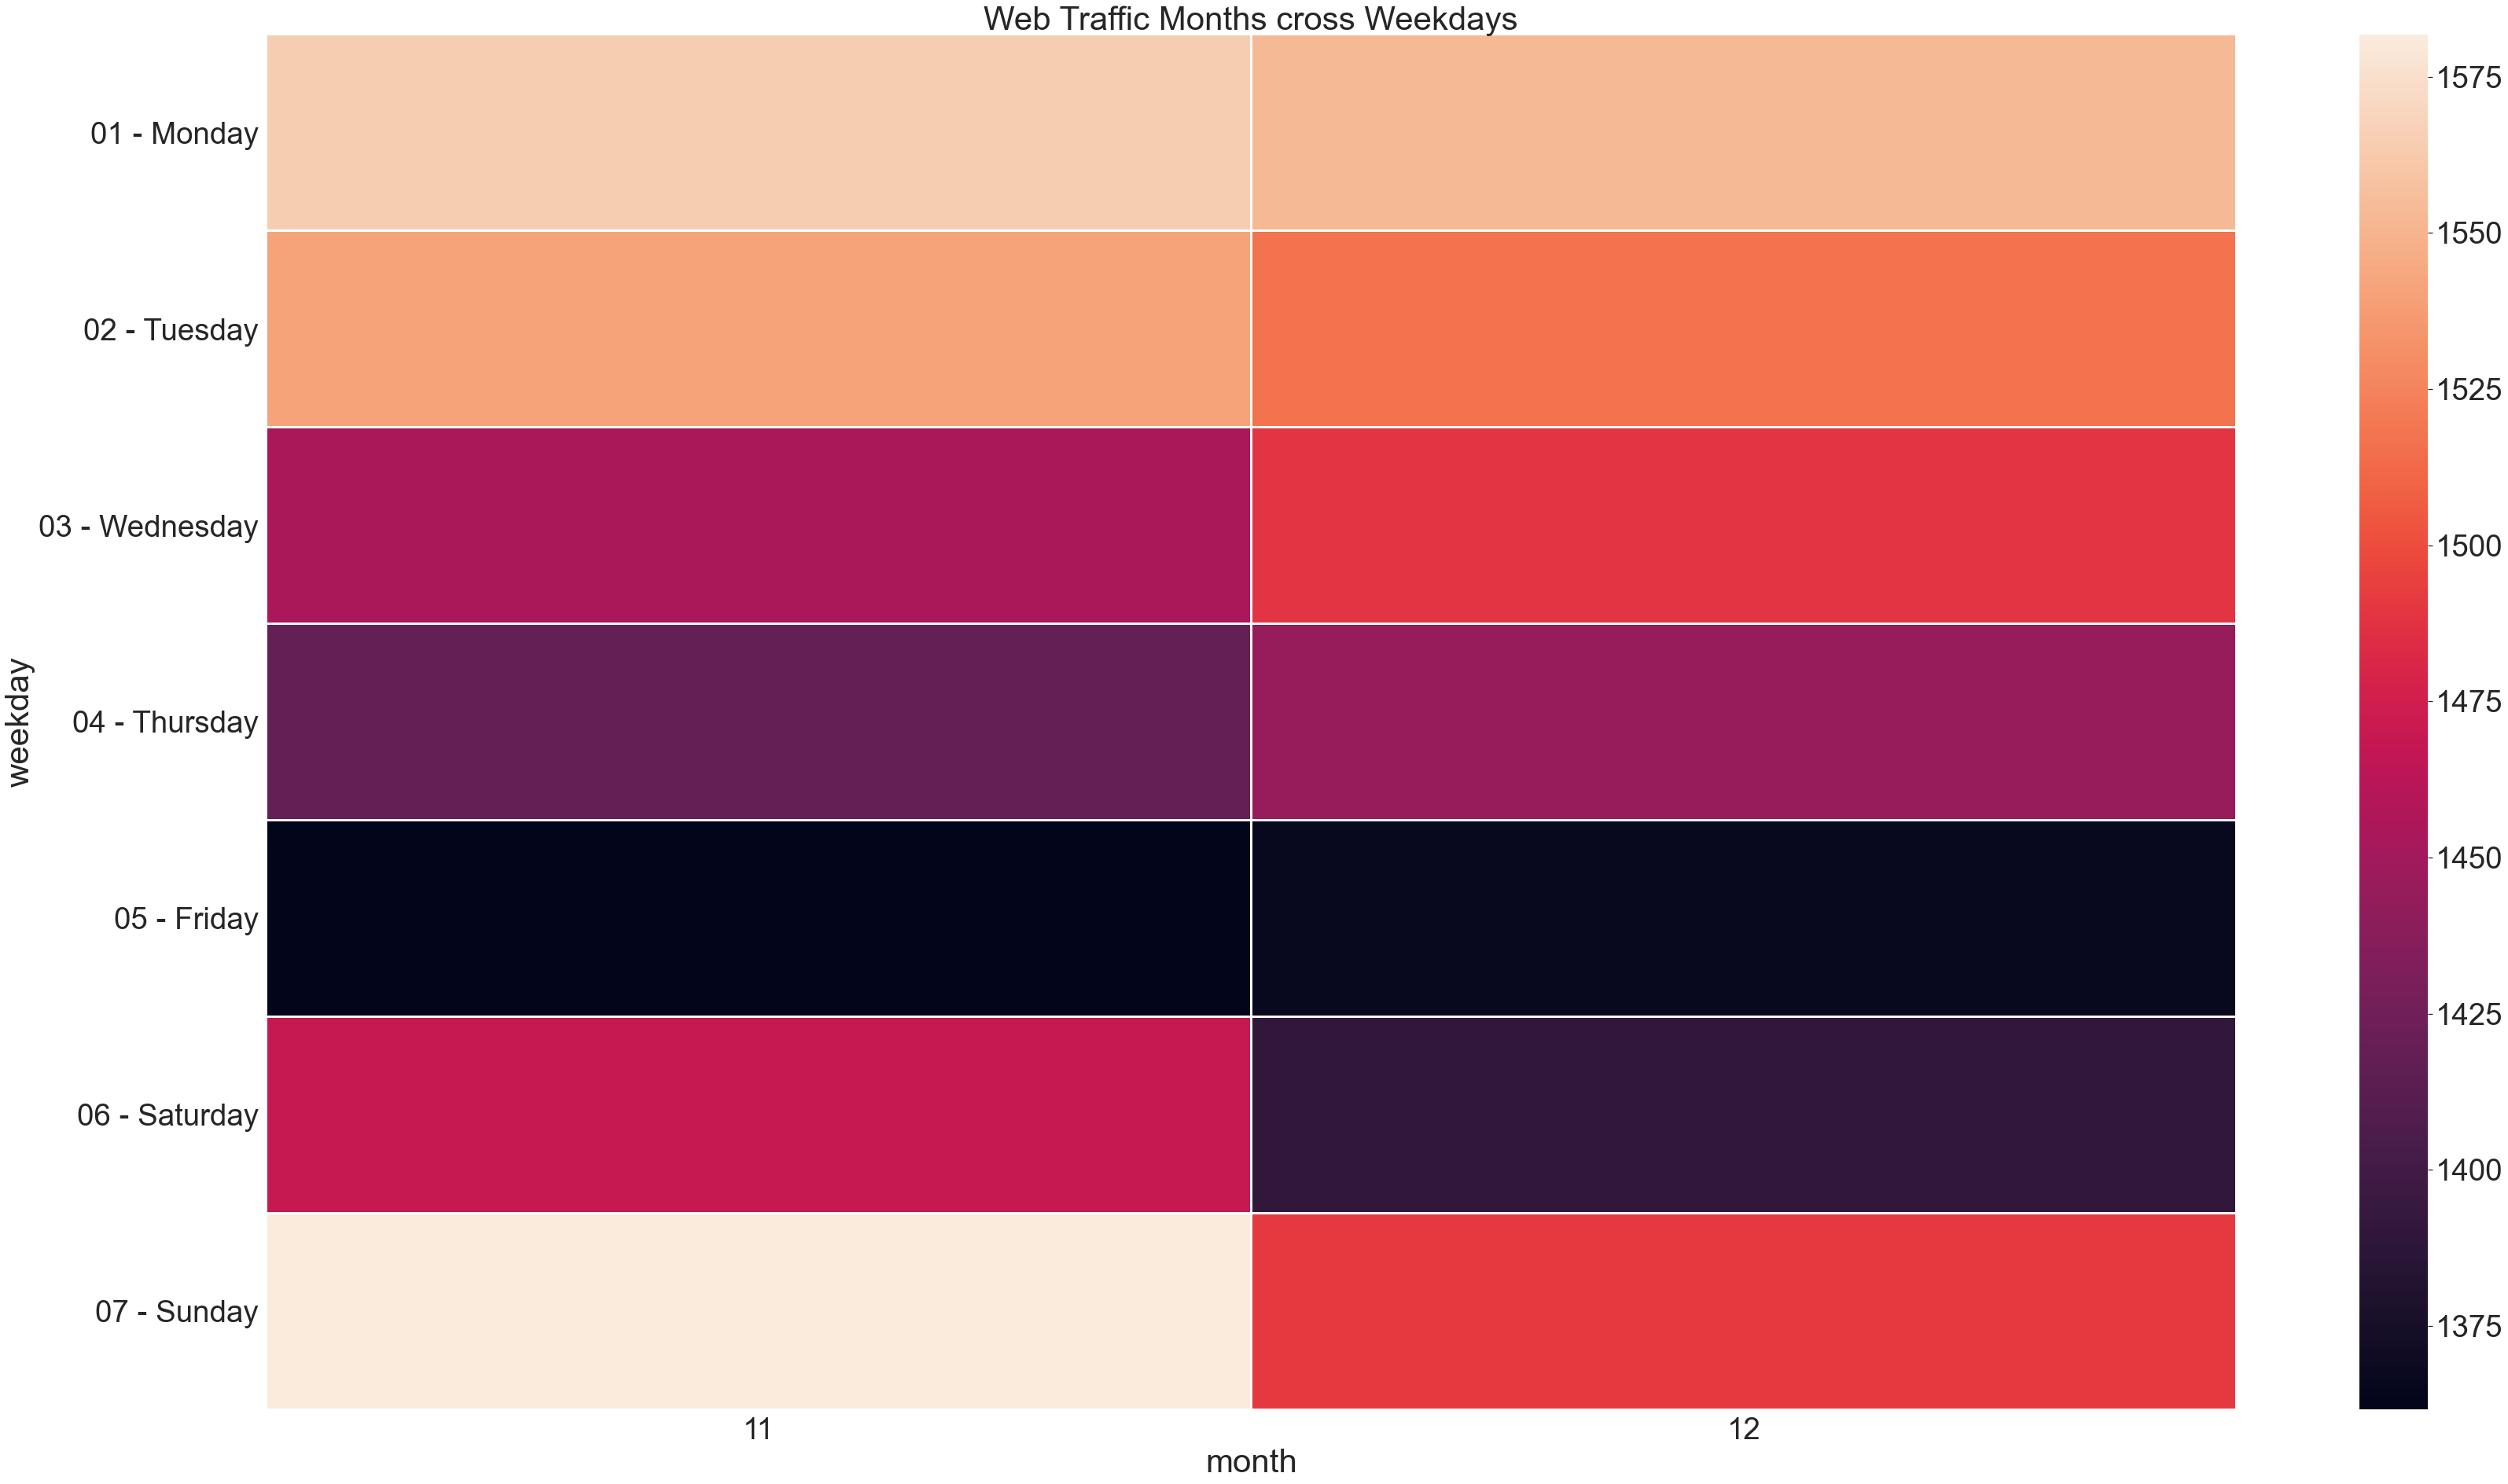

In [91]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

In [131]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

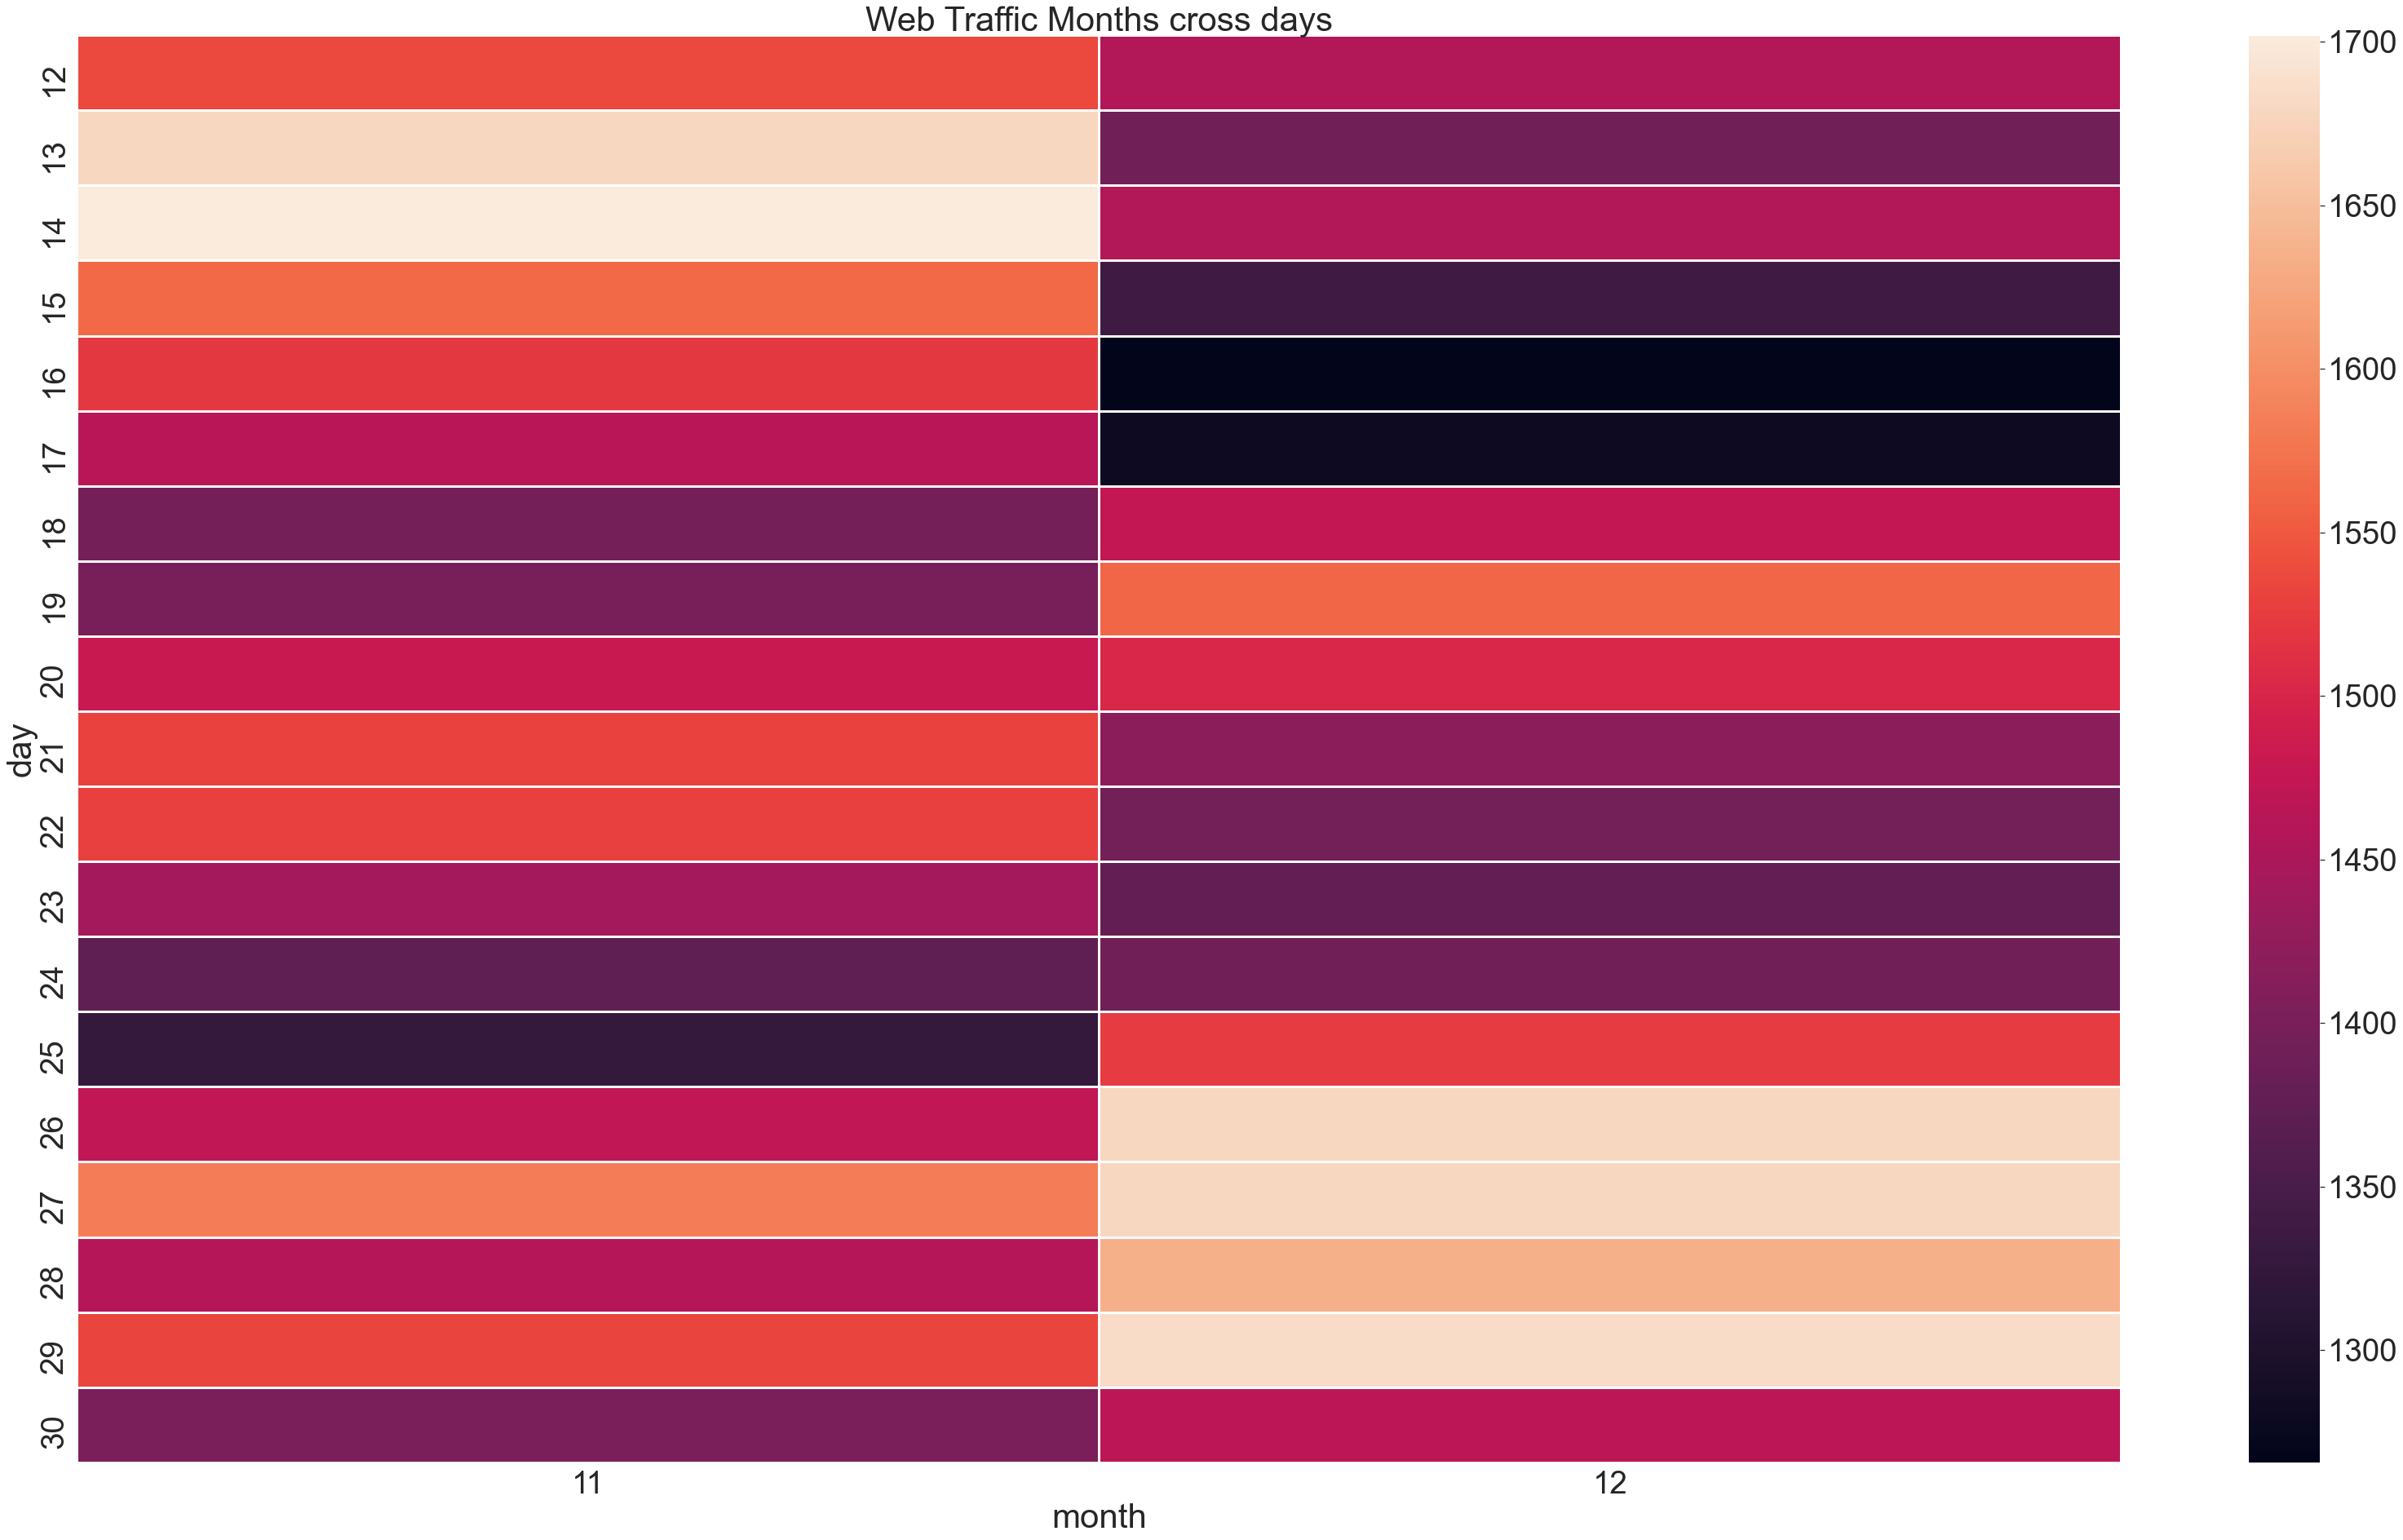

In [132]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()

In [151]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['date'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['date'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
times_series_means.head()

,date,Visits,weekday,year,month,day
0,2016-11-12,1536.471757,5,2016,11,12
1,2016-11-13,1679.630589,6,2016,11,13
2,2016-11-14,1701.941831,0,2016,11,14
3,2016-11-15,1564.172228,1,2016,11,15
4,2016-11-16,1520.673959,2,2016,11,16


In [148]:
df = lag_func(times_series_means,7)
df.head()

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2016-11-12,1536.471757,5,2016,11,12,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-13,1679.630589,6,2016,11,13,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-14,1701.941831,0,2016,11,14,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2016-11-15,1564.172228,1,2016,11,15,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2016-11-16,1520.673959,2,2016,11,16,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [160]:


def diff_creation(data):
    data.iloc[1:,"diff"] = np.nan
    data.iloc[1:,"diff"] = (data.iloc[:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

df_count = diff_creation(times_series_means)

# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices